# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!



In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
from collections import deque

import numpy as np
import random
import os
import torch
import matplotlib.pyplot as plt

In [3]:
env = UnityEnvironment(file_name='/data/Banana_Linux_NoVis/Banana.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
agent = Agent(state_size=37, action_size=4, seed=32)

In [7]:
save_path = 'checkpoint.pth'
episode_num = 1
def save_model(model, episode_num):
    if model is not None:
        checkpoint = {
            'episode_num': episode_num,
            'state_dict': model.state_dict()
        }
        torch.save(checkpoint, save_path)
        print('\r\tsave episode' + str(episode_num), end='')

def load_model(model):
    if os.path.exists(save_path) and model is not None:
        checkpoint = torch.load(save_path)
        episode_num = checkpoint['episode_num']
        model.load_state_dict(checkpoint['state_dict'])
        print('Loaded episode number: ', episode_num)
        return episode_num
    return 1

episode_num = load_model(agent.qnetwork_local)
print(episode_num)

1


In [8]:
def dqn(n_episodes=2000, max_t=100000, eps_start=1., eps_end=.01, eps_decay=.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = (int)(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score+=reward
            if done: break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay * eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end='')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end='')
            save_model(agent.qnetwork_local, i_episode)
        if np.mean(scores_window) >= 15.:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
            break
    return scores

In [9]:
%%time
scores = dqn()

Episode 636	Average Score: 15.00
Environment solved in 536 episodes!	Average Score: 15.00
CPU times: user 5min 15s, sys: 27.3 s, total: 5min 43s
Wall time: 8min 7s


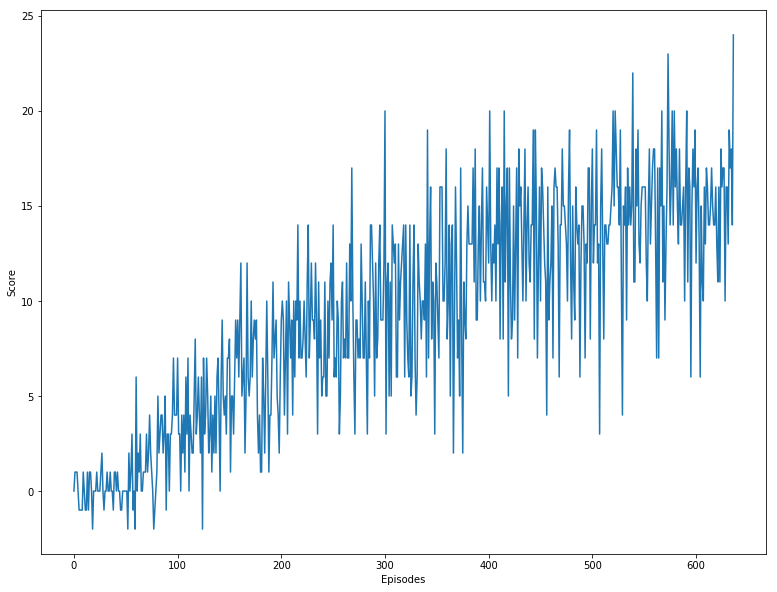

In [10]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.show()

# TESTING

In [12]:
agent.qnetwork_local.load_state_dict(torch.load('model.pth'))

env_info = env.reset(train_mode=False)[brain_name]

state = env_info.vector_observations[0]
score = 0

while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score+=reward
    state = next_state
    if done: break

print('Score:', score)

Score: 16.0


In [13]:
env.close()

# Future work to consider:


- Duelling DQN
- Double DQN
- Prioritized Experienced Replay